In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import sys
import warnings
warnings.filterwarnings("ignore")

In [0]:
dataset = pd.read_csv('train_sms_mine.csv', encoding='cp1252')

In [3]:
dataset.head

<bound method NDFrame.head of              Label                                            Message
0         Delivery  Dear Guest, Thanks for choosing The Edison. Or...
1            Hotel  Welcome to Southern University at Shreveport R...
2          Payment  Bill dated 2013-01-14 for Rs 626 has been gene...
3          Payment  Bill dated 2014-11-30 for Rs 323 has been gene...
4      Appointment  DEAR Zachary, THANK YOU FOR YOUR BOOKING (ORDE...
...            ...                                                ...
42005         bill  Bill Payment From: Waqas Amount: SAR 9,938.63 ...
42006         bill  Bill Payment From: Waqas Amount: RS 9,938.63 B...
42007         bill  Bill Payment From: Ahmed Amount: RS 9,938.63 B...
42008         bank  Your payment to Ben?s Books has been made on 1...
42009         bank  Your payment to Ali oil company has been made ...

[42010 rows x 2 columns]>

In [0]:
bank =[]
payement = []
bill = []
info = []
ham = []
appointment = []
hotel = []

In [0]:
for i in range(len(dataset)):
  if dataset['Label'][i] == 'bank':
    bank.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'bill':
    bill.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'Payment':
    payement.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'info':
    info.append(dataset['Message'][i])
  elif dataset['Label'][i] =='ham':
    ham.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'Appointment':
    appointment.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'Hotel':
    hotel.append(dataset['Message'][i])
  else:
    continue

In [0]:
data = pd.DataFrame(columns=['Text','Label',])

In [0]:
text = []
label = []
for tex in bank:
  text.append(tex)
  label.append(1)
for tex in bill:
  text.append(tex)
  label.append(1)
for tex in payement:
  text.append(tex)
  label.append(1)

##### Neg

for tex in info:
  text.append(tex)
  label.append(0)
for tex in ham:
  text.append(tex)
  label.append(0)
for tex in appointment:
  text.append(tex)
  label.append(0)
for tex in hotel:
  text.append(tex)
  label.append(0)

In [8]:
data['Text'] = text
data['Label'] = label
data.head

<bound method NDFrame.head of                                                     Text  Label
0      Thank you for using your ICICI bank CREDITcard...      1
1      OTP is 817453 for the txn of INR 8262.00 at SP...      1
2      Ur transaction on HDFC Bank CREDIT Card ending...      1
3      Thank you for using your HDFC bank Debitcard e...      1
4      Dear Customer, You have made a Debit Card purc...      1
...                                                  ...    ...
26607  Welcome to Fossil Ridge Park R.No. 195, 132, 1...      0
26608  Welcome to Curwood Castle R.No. 491, 236 Ch.In...      0
26609  Welcome to MAINSOURCE FNCL GRP R.No. 203, 174,...      0
26610  Welcome to Seto Inland Sea R.No. 384, 198 Ch.I...      0
26611  Welcome to National Aviary R.No. 109, 589, 533...      0

[26612 rows x 2 columns]>

In [9]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index()
data.head

<bound method NDFrame.head of                                                     Text  Label
11255  Hi Customer, Booking ID: W9OR52B. Seats: GOLD-...      0
25681  Welcome to Gamble House R.No. 369, 332, 516 Ch...      0
9865   Hi Customer, Booking ID: W52C39D. Seats: STAND...      0
17304  where are you going to celebrate New year night ?      0
5457   Thank you for choosing KSRTC for 2011-05-22 at...      0
...                                                  ...    ...
18359                           House full 3 show at 3pm      0
12135  Thank you for using your HDFC bank CREDITcard ...      0
10283  Hi Customer, Booking ID: WJCOKGE. Seats: STAND...      0
17985                                   6 in the evening      0
3882   DEAR Kaleb, THANK YOU FOR YOUR BOOKING (ORDER ...      0

[26612 rows x 2 columns]>

In [0]:
punctuation = '.!"#$%&()*+-/:,;<=>?@[\\]^_`{|}~'

data['Text'] = data['Text'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))
data['Text'] = data['Text'].str.lower()
data['Text'] = data['Text'].str.replace("[0-9]", " ")
data['Text'] = data['Text'].apply(lambda x: ' '.join(x.split()))

In [0]:
from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 25000
MAX_SEQUENCE_LENGTH = 25
EMBEDDING_DIM = 20

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n“”’\'∞θ÷α•à−β∅³π‘₹´°£€\×™√²—', lower=True)
tokenizer.fit_on_texts(data['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

In [12]:
data.head

<bound method NDFrame.head of                                                     Text  Label
11255  hi customer booking id w or b seats goldk k k ...      0
25681             welcome to gamble house rno chin chout      0
9865   hi customer booking id w c d seats standardh h...      0
17304    where are you going to celebrate new year night      0
5457   thank you for choosing ksrtc for at cabka a ch...      0
...                                                  ...    ...
18359                              house full show at pm      0
12135  thank you for using your hdfc bank creditcard ...      0
10283  hi customer booking id wjcokge seats standardm...      0
17985                                     in the evening      0
3882   dear kaleb thank you for your booking order id...      0

[26612 rows x 2 columns]>

In [13]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(data['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (26612, 25)


In [14]:
Y = pd.get_dummies(data['Label']).values
print('Shape of label tensor:', Y.shape)
Y[3]

Shape of label tensor: (26612, 2)


array([1, 0], dtype=uint8)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(23950, 25) (23950, 2)
(2662, 25) (2662, 2)


In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout , GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(GRU(10, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

In [17]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 21555 samples, validate on 2395 samples
Epoch 1/5





21555/21555 [==============================] - 21s 962us/step - loss: 0.2075 - acc: 0.9513 - val_loss: 0.0724 - val_acc: 0.9582
Epoch 2/5
21555/21555 [==============================] - 16s 728us/step - loss: 0.0690 - acc: 0.9591 - val_loss: 0.0612 - val_acc: 0.9633
Epoch 3/5
21555/21555 [==============================] - 16s 765us/step - loss: 0.0620 - acc: 0.9604 - val_loss: 0.0605 - val_acc: 0.9603
Epoch 4/5
21555/21555 [==============================] - 16s 735us/step - loss: 0.0594 - acc: 0.9605 - val_loss: 0.0576 - val_acc: 0.9637
Epoch 5/5
21555/21555 [==============================] - 16s 741us/step - loss: 0.0586 - acc: 0.9603 - val_loss: 0.0579 - val_acc: 0.9603


In [18]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2662/2662 [==============================] - 2s 642us/step
Test set
  Loss: 0.060
  Accuracy: 0.960


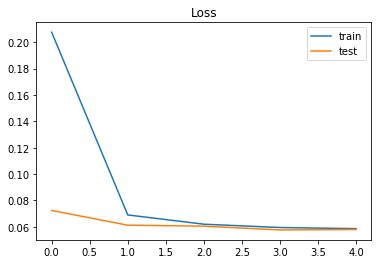

In [19]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

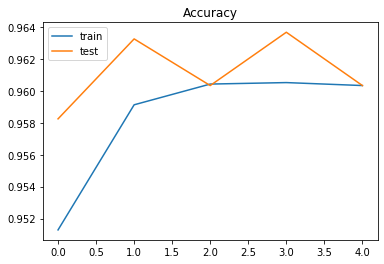

In [20]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [0]:
def predictor(str):
  new_sms = [str]
  seq = tokenizer.texts_to_sequences(new_sms)
  padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
  pred = model.predict(padded)
  if(np.argmax(pred)) == 0:
    return "Non Financial"
  else:
    return "Financial"

In [36]:
predictor('OTP is 882352 for the txn of INR 4901.00 at AMAZON SELLER SERVICES on your SBI bank CREDIT card ending with 5168. Valid till 13:50:31. Do not share the OTP with anyone for security reasons')


'Financial'

In [37]:
predictor('Step into season with Alkaram Studios spring/summer collection & enjoy designs celebrating spring!')

'Non Financial'

In [38]:
predictor('Storm Fibre(powered by Cybernet) High Speed Internet +HDTv (unlimited) upto 100mb packages 10mb 1999+tax 20mb 2999+tax 30mb 3999+tax callnow 03208449106')

'Non Financial'

In [39]:
predictor("AOA Sir! Today I won't come to office")

'Non Financial'

In [40]:
predictor('Bill Payment From: Waqas Amount: SAR 9,938.63 Biller: 018 Date: 2019-12-14 14:11:39')

'Financial'

In [41]:
predictor('Dear Customer, Online Clearing Cheque amounting to 50,000 has been credited to your BAHL account 0029XXXXX 0n 1-1-20')

'Financial'

In [42]:
predictor('Bill dated 2020-3-10 for RS 10,000 has been generated for your PTCL fixedline/broadband relationship no. 18651423. The same will reach you by 2020-4-5. Due date: 2020-3-15.')

'Financial'

In [43]:
predictor('Repair ref.no for your car is JC41166545 opened on 2009-11-15 22:29hrs,ETD of your car is 2009-11-16 16:22hrs and est.repair amt is Rs.991 Rgds, Maha Veer Auto Agency')

'Non Financial'